In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
import matplotlib_inline 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Formating Plots
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
set_sns_format(width=14, height=8)

In [3]:
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     

    if typ == 'line':
        for line in ax.lines:
            for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                label = "{:.0f}".format(y_value)
                ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)

In [4]:
df = pd.read_csv(r"C:\Users\ssai\OneDrive\Data_26-07\labs\lab-random-variable-distributions\files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [5]:
df = df.drop("Customer", axis = 1)
df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
numerical_df = df.select_dtypes(np.number)
categorical_df = df.select_dtypes(object)

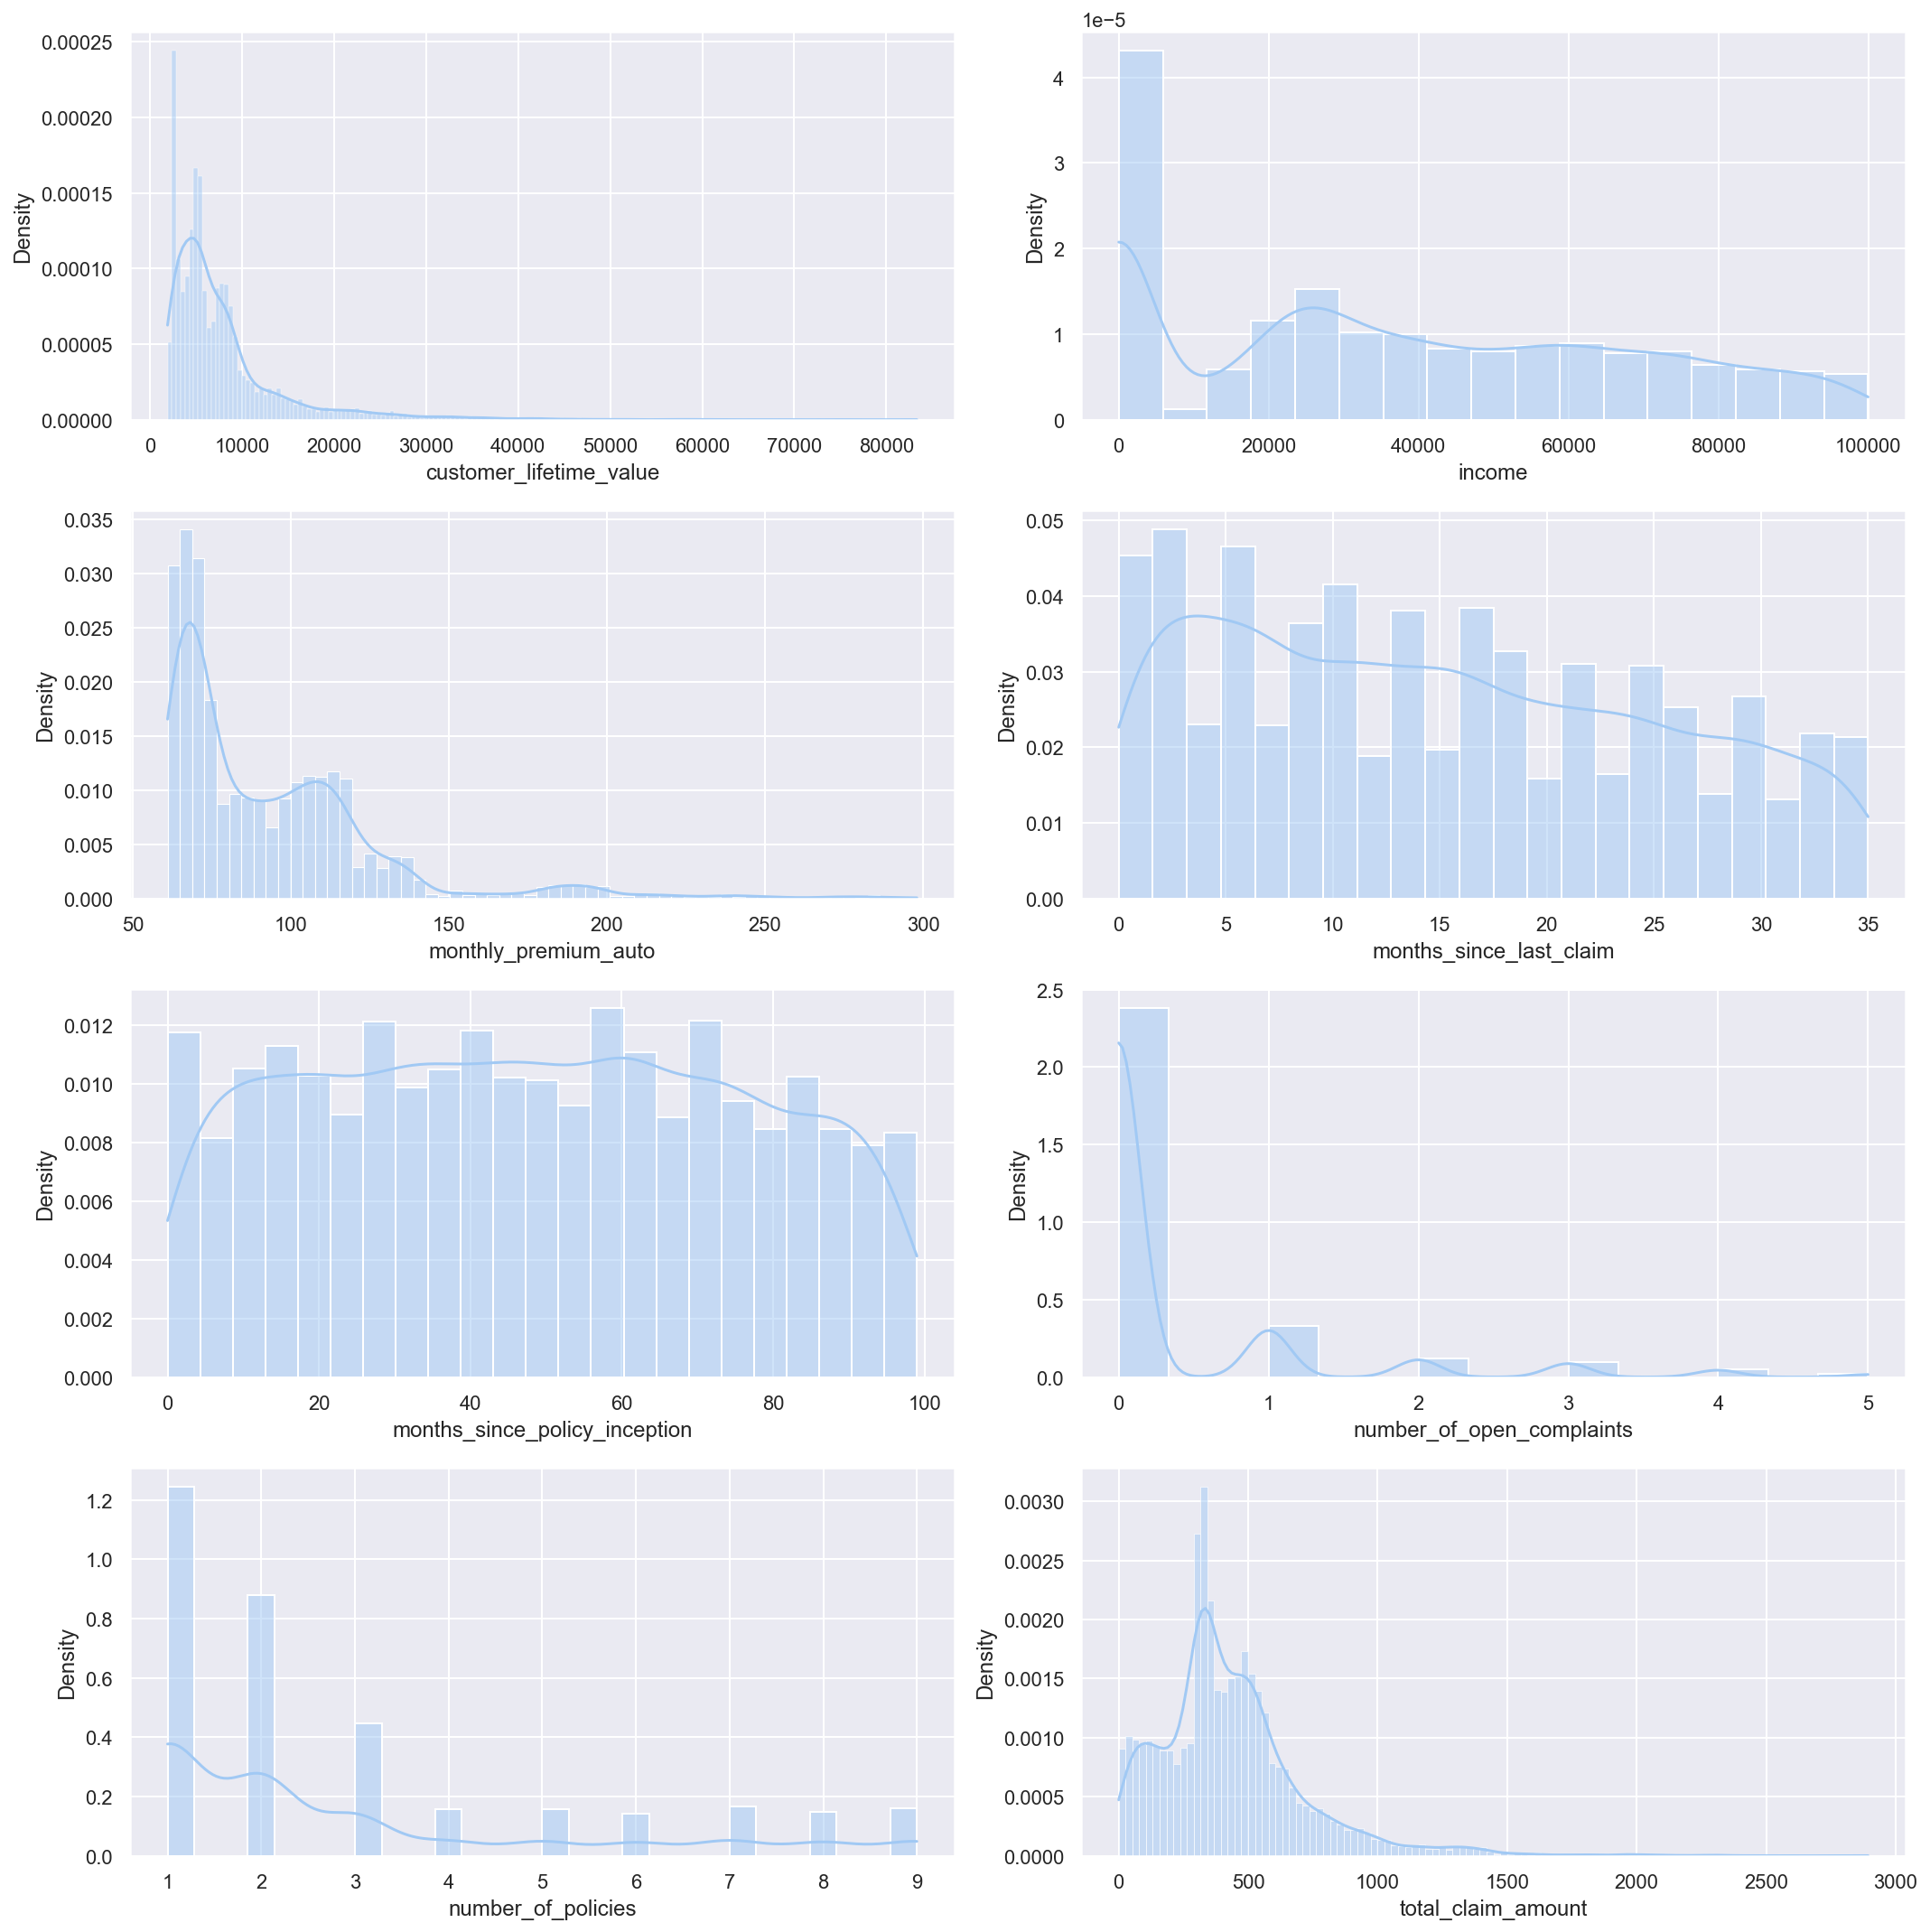

In [6]:
cols = numerical_df.columns.to_list()

# create the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=numerical_df[col], kde=True, stat='density', ax=ax)

    
fig.tight_layout()
plt.show()

In [7]:
numerical_df.agg(['skew', 'kurtosis']).transpose()
# Skewness
# Fairly Symmetrical: -0.5 to 0.5
# Moderate Skewed: -0.5 to -1.0 and 0.5 to 1.0
# Highly Skewed: < -1.0 and > 1.0

,skew,kurtosis
customer_lifetime_value,3.032280,13.823533
income,0.286887,-1.094326
monthly_premium_auto,2.123546,6.193605
months_since_last_claim,0.278586,-1.073668
months_since_policy_inception,0.040165,-1.133046
number_of_open_complaints,2.783263,7.749308
number_of_policies,1.253333,0.363157
total_claim_amount,1.714966,5.979401


* Features do not follow normal or exponential variable

In [8]:
data_log = np.log(numerical_df)

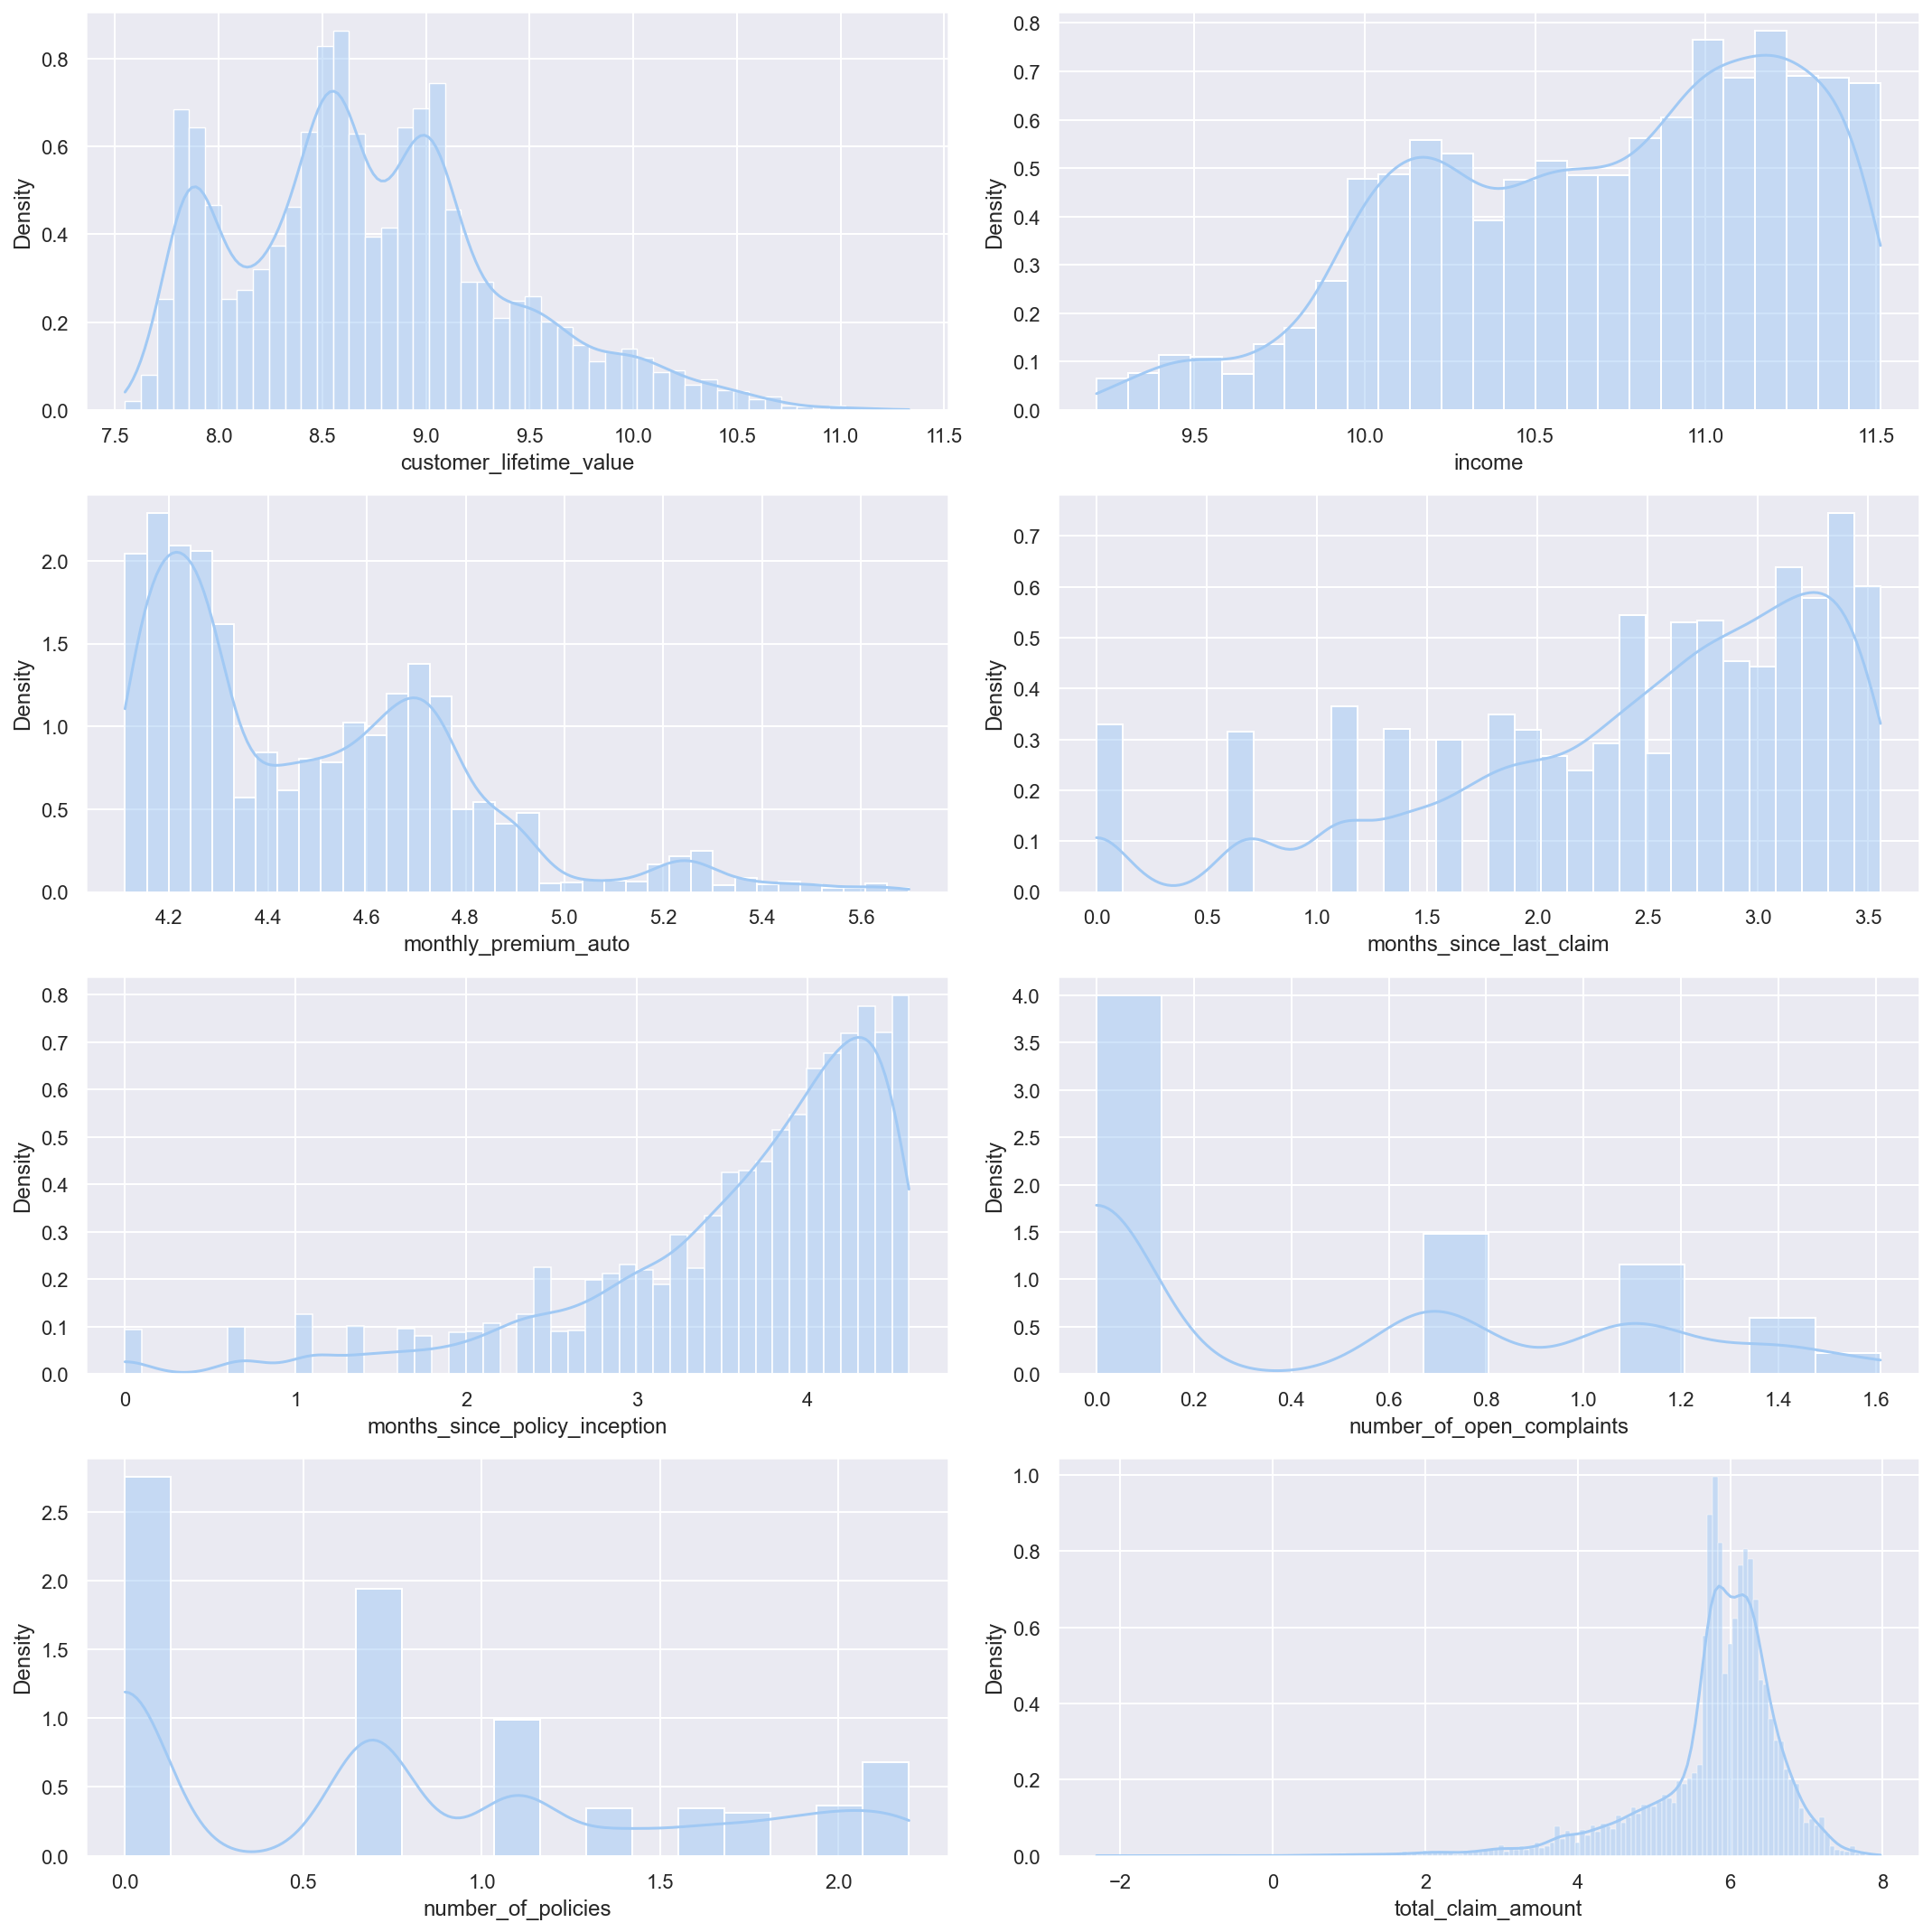

In [9]:
cols = data_log.columns.to_list()

# create the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=data_log[col], kde=True, stat='density', ax=ax)

    
fig.tight_layout()
plt.show()

In [10]:
data_log.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
customer_lifetime_value,0.575941,0.082682
income,NaN,NaN
monthly_premium_auto,1.006154,0.841733
months_since_last_claim,NaN,NaN
months_since_policy_inception,NaN,NaN
number_of_open_complaints,NaN,NaN
number_of_policies,0.433288,-1.066354
total_claim_amount,-1.920033,6.359596


* The log transformation changes the plots but none of the variables are normal or exponentially distributed
